In [52]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.express import scatter_3d

In [12]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names) # data = 4개씩 들어있는 것
iris_df['species'] = [iris.target_names[i] for i in iris.target]
iris_df.info()
print(iris_df.head())
# print(iris)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa

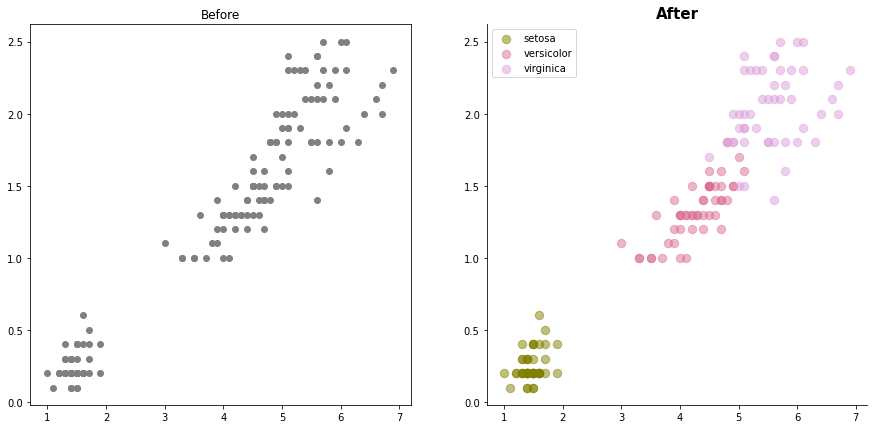

In [21]:
cmap= plt.get_cmap('Reds')
inner_colors = cmap([0.75, 0.5, 0.35, 0.25])

fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df, color='gray')   #판다스에서 데이터프레임 가지고 바로 맷플랍 그릴 수 있음. 
#맷플랍에서 플랏 그릴때도 데이터를 데이터프레임을 쓸 수 있음. 맷플롯과 판다스가 밀접하게 같이 업데이트 되어야하는이유.. 

ax[0].set_title('Before')



ax[1].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df[iris_df['species']=='setosa'], color='olive', alpha=0.5, label='setosa', s=70)   #알파값준이유 - 여러개 겹쳐지면 더 진해보이라고
ax[1].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df[iris_df['species']=='versicolor'], color='palevioletred', alpha=0.5, label='versicolor', s=70) 
ax[1].scatter(x='petal length (cm)', y='petal width (cm)', data=iris_df[iris_df['species']=='virginica'], color='plum', alpha=0.5, label='virginica', s=70) 

ax[1].set_title('After', fontsize=15, fontweight='bold')
ax[1].legend()


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

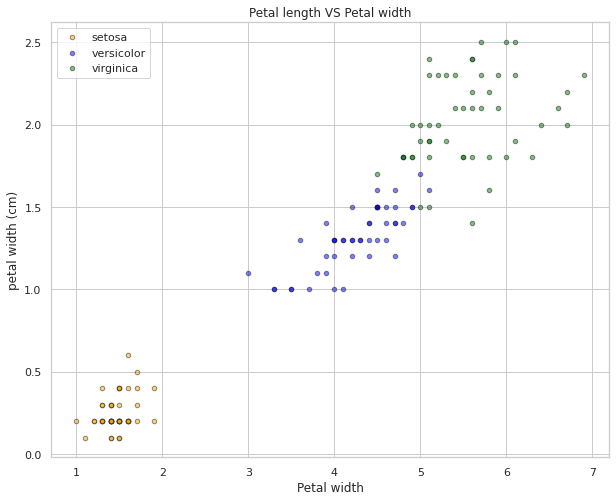

In [37]:
sns.set(style = 'whitegrid')
axes = iris_df[iris_df['species'] == 'setosa'].plot(kind = 'scatter', 
                                              x = 'petal length (cm)', y = 'petal width (cm)', 
                                              color = 'orange', label = 'setosa', edgecolor='k', figsize = (10,8), alpha=0.5) # axes 만들 때 figsize 지정
iris_df[iris_df['species'] == 'versicolor'].plot(kind = 'scatter', 
                                              x = 'petal length (cm)', y = 'petal width (cm)', 
                                              color = 'blue', label = 'versicolor', ax = axes, edgecolor='k', alpha=0.5)# ax = axes 위의 axes에 겹쳐서 그려라
iris_df[iris_df['species'] == 'virginica'].plot(kind = 'scatter', 
                                              x = 'petal length (cm)', y = 'petal width (cm)', 
                                              color = 'green', label = 'virginica', ax = axes, edgecolor='k', alpha=0.5)
axes.set_xlabel('Petal length')
axes.set_xlabel('Petal width')
axes.set_title('Petal length VS Petal width')
plt.show()

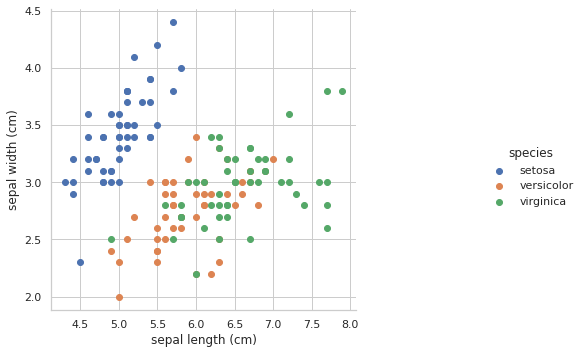

In [42]:
sns.FacetGrid(iris_df, hue = 'species').map(plt.scatter, 
        'sepal length (cm)', 'sepal width (cm)').add_legend()
fig = plt.gcf() #gcf=> GetCurrentFigure
fig.set_size_inches(10,6)
plt.show()

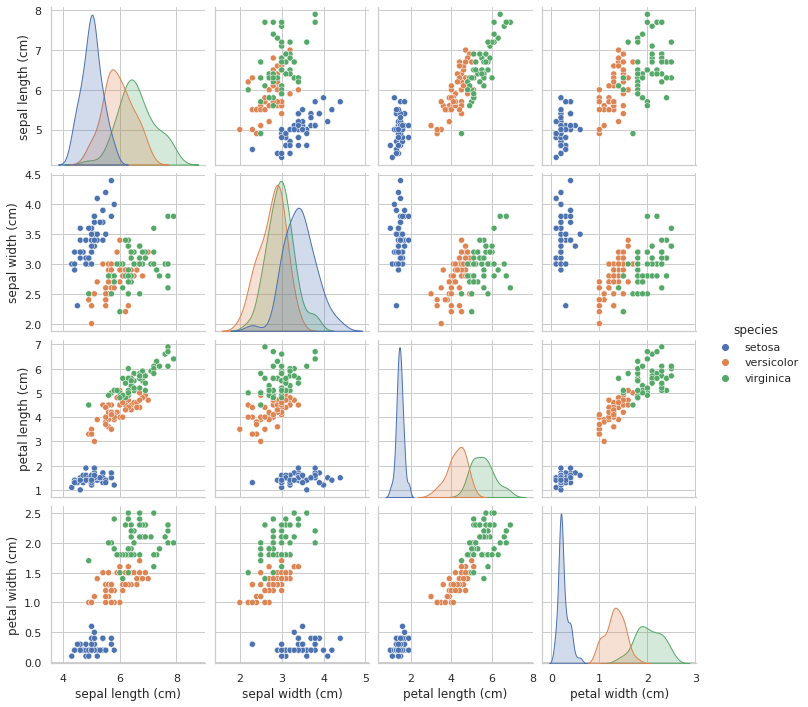

In [44]:
sns.pairplot(iris_df, hue = 'species') # hue-> 2차원 그래프에서 하나를 더 표현할 때 species를 기준으로 다른 색을 부여 # x,y축이 같은 그래프는 확률밀도함수를 그린것이다.(x축은 사이즈, y축은 출현빈도- 해당하는 x축에 많이 겹칠수록 y가 높게)
plt.show()

In [50]:
fig = scatter_3d(iris_df, x = 'sepal length (cm)',
                 y = 'petal length (cm)', z = 'petal width (cm)', 
                 color = 'sepal width (cm)', symbol = 'species', size = 'petal length (cm)', size_max = 18, opacity = 0.7)
fig.show()

## 히스토그램 그리기

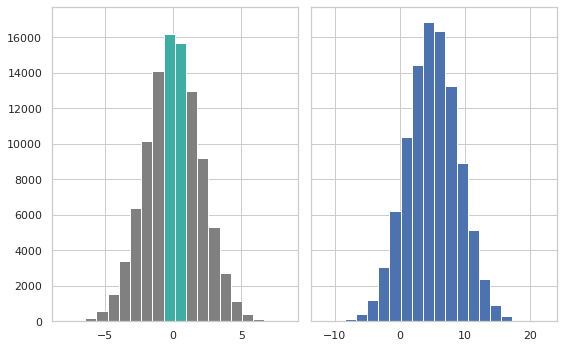

In [59]:
color_map = ['gray'] * 20
color_map[9] = color_map[10] = '#3caea3'

N_point = 100000
n_bins = 20

dist1 = np.random.normal(0, 2, N_point)# 평균 0 , 표준편차가 2인 data N_point 개 생성
dist2 = np.random.normal(0, 10, N_point) * 0.4 +5# 평균 0 , 표준편차가 10인 data N_point 개 생성-> 평균이 5 표준편차가 0.4인 표준분포화

fig, axes = plt.subplots(1, 2, sharey = True, tight_layout = True, #sharey = share y(y축을 공유한다)
                        figsize = (8,5))
N, bins, patches = axes[0].hist(dist1, bins = n_bins)
for i, patch in enumerate(patches):
  patch.set_facecolor(color_map[i])
axes[1].hist(dist2, bins = n_bins)
plt.show()

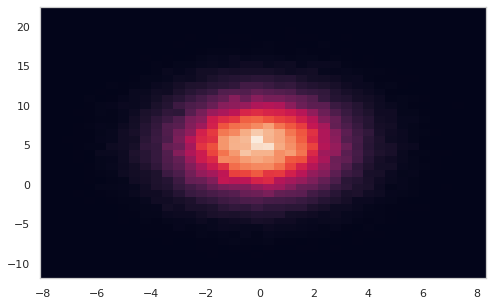

In [62]:
fid, ax = plt.subplots(figsize=(8,5))
hist = ax.hist2d(dist1, dist2, bins = 40) # bins= 줄이 40 줄이다.

plt.show()

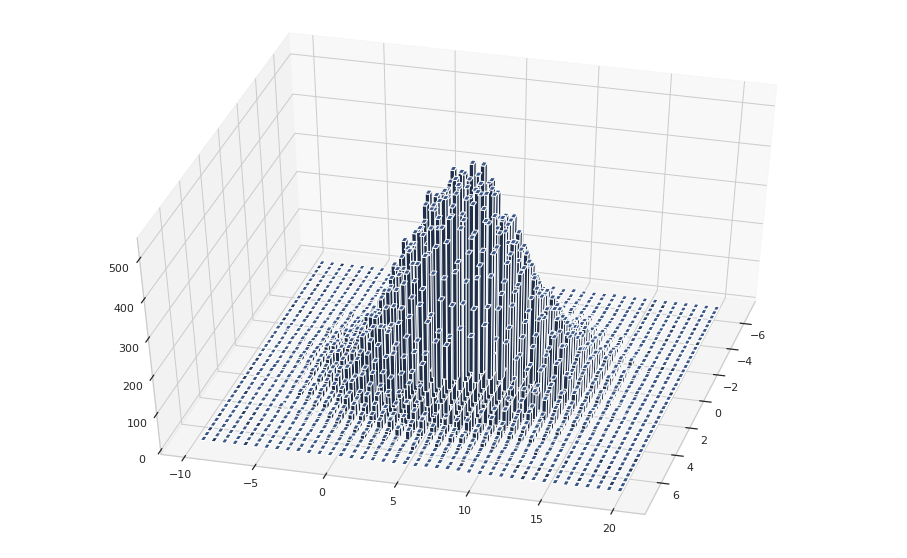

In [70]:
fig= plt.figure(figsize=(16, 10))
ax =fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(dist1, dist2, bins=40,
                                      range=[[-7,7], [-10,20]]) # 값을 볼 range

xpos, ypos= np.meshgrid(xedges[:-1]+0.25, yedges[:-1]+0.5, indexing='ij')

xpos= xpos.ravel()
ypos= ypos.ravel()

zpos= 0
dx= dy = 0.3 * np.ones_like(zpos)
dz= hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.view_init(elev=45.0, azim=15) # elev= 보는 각도, azim = 보는 방향
plt.show()

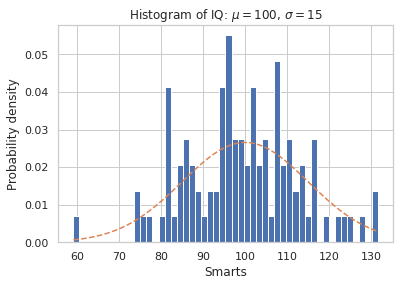

In [73]:
mu = 100
sigma = 15
x = np.random.normal(mu,sigma, 100) #평균이 mu, 표준편차가 sigma 인 data 100개 생성

num_bins = 50 

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density = True) # x개의 data를 num_bins 만큼으로 쪼개서 표현, density = 밀도비율(전체 갯수 중의 비율)
y = ((1/ (np.sqrt(2*np.pi)*sigma))*
     np.exp(-0.5 * ( (bins - mu)/sigma )**2)) #w정규분포를 나타내는 확률밀도함수를 파이썬 코드로 만든 것
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



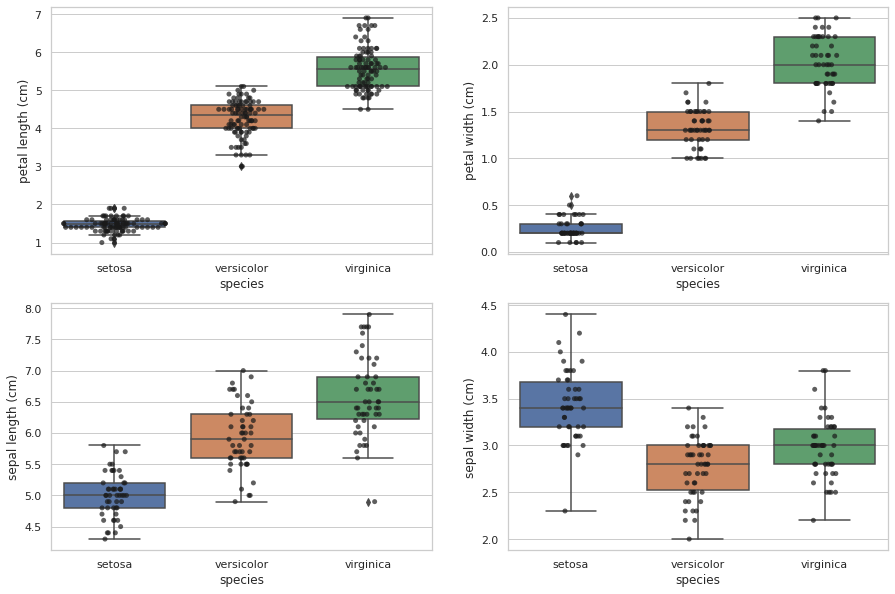

In [79]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species', y = 'petal length (cm)', data = iris_df)
sns.stripplot(x='species', y = 'petal length (cm)', data = iris_df,
              color='k', alpha = 0.7) # 어느정도의 분포를 알 수 있는 그래프, 일정한 분위 안에서 
plt.subplot(2,2,2)
sns.boxplot(x='species', y = 'petal width (cm)', data = iris_df)
sns.stripplot(x='species', y = 'petal width (cm)', data = iris_df
              , color='k', alpha = 0.7)

plt.subplot(2,2,3)
sns.boxplot(x='species', y = 'sepal length (cm)', data = iris_df)
sns.stripplot(x='species', y = 'sepal length (cm)', data = iris_df
              , color='k', alpha = 0.7)

plt.subplot(2,2,4)
sns.boxplot(x='species', y = 'sepal width (cm)', data = iris_df, 
            whis = np.inf)# 이상치를 판별하지 않겠다, inf(무한대)
sns.stripplot(x='species', y = 'sepal width (cm)', data = iris_df
              , color='k', alpha = 0.7)

plt.show()

# boxplot 에서의 상자 - 14분위(25%지점) ~ 3사분위(75%지점), 상자 중간 선 : 중위값  선: 상자의 크기의 위 아래로 1.5배 인 것들의 최대 최소값, 이상치(점): 상자의 크기의 위 아래로 1.5배 인 것들의 최대 최소값를 넘어산 값

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



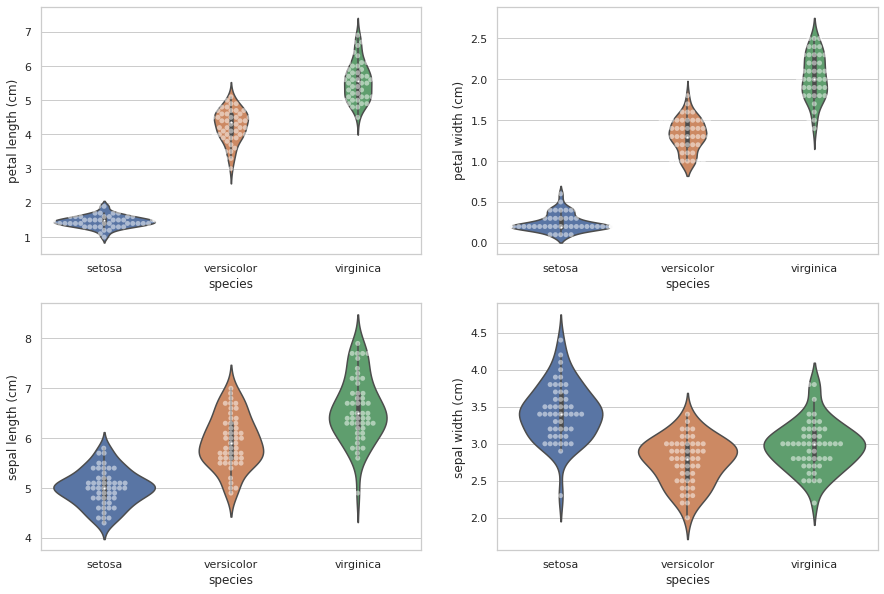

In [80]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'petal length (cm)', data = iris_df)
sns.swarmplot(x='species', y = 'petal length (cm)', data = iris_df,
              color='w', alpha = 0.5)

plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'petal width (cm)', data = iris_df)
sns.swarmplot(x='species', y = 'petal width (cm)', data = iris_df
              , color='w', alpha = 0.5)

plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'sepal length (cm)', data = iris_df)
sns.swarmplot(x='species', y = 'sepal length (cm)', data = iris_df
              , color='w', alpha = 0.5)

plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'sepal width (cm)', data = iris_df, 
            whis = np.inf)# 이상치를 판별하지 않겠다, inf(무한대)
sns.swarmplot(x='species', y = 'sepal width (cm)', data = iris_df
              , color='w', alpha = 0.5)

plt.show()
# violinplot = boxplot + 분포까지 볼 수 있는 plot

## 